## Monte Carlo Influence Estimation
Notebook used for testing the social network enviroment and mainly used for the computation required in point 1 of the project.
Current implementation:
+ generates a random set of bids for each advertiser (total of 8) and computes the best allocation through of ads
+ estimates the average number of seeds $|S|$ activated by the learner given the allocation
+ runs a Monte Carlo Influence Estimation algorithm with an increasing number of repetitions $R$ in order to estimate the influence generated by the set of bids of the learner
+ computes the error as: $ error = \sqrt{\frac{1}{R}\log (|S|) \log (\frac{1}{\sigma})} \cdot nodes$
with $\sigma = 0.05$
+ plots the error with respect to a specific MC run with a certain number of repetitions
+ plots the MC estimate of each run with its associated interval $\pm error$


In [7]:
import numpy as np 
from SocialNetwork.social_network_environment import *
from SocialNetwork.influence_probabilities import *
from SocialNetwork.influence_estimation import *


In [8]:
enviroment = social_network_environment()
enviroment.init_from_json(json_path_network = 'Config/network_200.json', json_path_features = 'Config/features_200.json')

In [9]:
import random
import json
from Advertising.learners.greedyLearner import bids_simulation

categories = 5
adv_number = 7 # total advertisers for testing
ad_allocation = []

# setting up a random ad_allocation
learner_bids = [random.randint(0,4) for _ in range(categories)]

adversary_bids = []
for _ in range(0, adv_number): 
    adversary_i_bids = []
    for _ in range(0, categories):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)

ad_allocation, _ = bids_simulation(learner_bids, adversary_bids, categories, enviroment)

json_slots = open('Config/prominence.json', 'r')
slots = json.load(json_slots)


In [10]:

iterations = np.arange(start = 10, stop = 1000, step = 10)
activations = []
seeds_estimates = []
gang = []

for iter in iterations:
    node_prob, seeds = estimate_bids_influence( social_network= enviroment, ad_allocation_list= ad_allocation,
                                         learner_id=1, slot_prominence=slots['slots'], iterations= iter)
    net_percentage = np.mean(node_prob) * enviroment.active_nodes.shape[0]
    
    
    activations.append(net_percentage)
    seeds_estimates.append(seeds)
    print("ITER #"+str(iter)+": \tPercentage: "+str(net_percentage)+" \tSeeds: "+str(seeds))



ITER #10: 	Percentage: 99.3 	Seeds: 33.7
ITER #20: 	Percentage: 99.1 	Seeds: 34.4
ITER #30: 	Percentage: 99.49999999999999 	Seeds: 33.06666666666667
ITER #40: 	Percentage: 99.92500000000001 	Seeds: 32.9
ITER #50: 	Percentage: 101.8 	Seeds: 34.32
ITER #60: 	Percentage: 101.81666666666666 	Seeds: 32.95
ITER #70: 	Percentage: 101.92857142857142 	Seeds: 34.285714285714285
ITER #80: 	Percentage: 103.69999999999999 	Seeds: 33.2375
ITER #90: 	Percentage: 100.72222222222223 	Seeds: 34.422222222222224
ITER #100: 	Percentage: 98.44999999999999 	Seeds: 32.9
ITER #110: 	Percentage: 99.95454545454544 	Seeds: 33.5
ITER #120: 	Percentage: 103.075 	Seeds: 33.666666666666664
ITER #130: 	Percentage: 102.20769230769228 	Seeds: 34.253846153846155
ITER #140: 	Percentage: 100.75 	Seeds: 33.75714285714286
ITER #150: 	Percentage: 102.34 	Seeds: 34.806666666666665
ITER #160: 	Percentage: 101.36875 	Seeds: 34.18125
ITER #170: 	Percentage: 102.0470588235294 	Seeds: 33.78235294117647
ITER #180: 	Percentage: 101.4

In [11]:
import math

sigma = 0.05 # probability that the estimate is outside the confidence interval
nodes = enviroment.adj_matrix.shape[0] # number of nodes

errors = []
for index, iter in enumerate(iterations):
    error = (math.sqrt( 1/iter * math.log(seeds_estimates[index]) * math.log(1/sigma)) * nodes)
    errors.append(error)


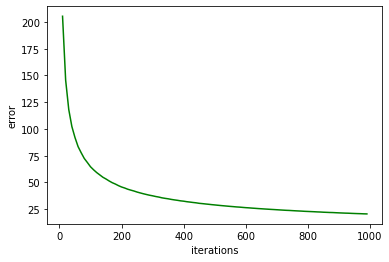

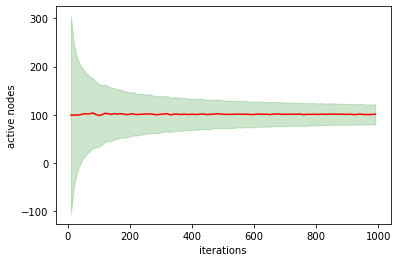

In [12]:

from matplotlib import pyplot as plt



errors = np.array(errors)
activations = np.array(activations)

plt.figure(0)
plt.plot(iterations, errors, "green")
plt.xlabel("iterations")
plt.ylabel("error")

plt.figure(1)
plt.plot(iterations, activations, "red")
plt.xlabel("iterations")
plt.ylabel("active nodes")
plt.fill_between(iterations, (activations-errors), (activations+errors), color = "green", alpha = 0.2)



plt.show()


